In [1]:
# set workspace
WhoIsWorking = "AI"
WorkLocation = "School"

if WhoIsWorking == "RT":
    if WorkLocation == "Home":
        folder_path = r'C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data'
    elif WorkLocation == "School":
        folder_path = r'D:\ENGO645_TermProject_Data'
elif WhoIsWorking == "AA":
    folder_path = ''
elif WhoIsWorking == "IA":
    folder_path = r'C:\Users\afoam\assignments\ENGO645_TorontoCrimeAnalysis'
elif WhoIsWorking == "AI":
    folder_path = r'C:\Adewale_Directory\Capacity_Building\MGIS\Lecture_Note\WINTER2024\ENGO645\Course_Project\Project_Data'

print(folder_path)

C:\Adewale_Directory\Capacity_Building\MGIS\Lecture_Note\WINTER2024\ENGO645\Course_Project\Project_Data


Essential libraries for spatial analysis were installed and imported, such as **geopandas**, **libpysal**, and **esda**.

In [2]:
# pip install libpysal 
# pip install esda
# pip install statsmodels

In [3]:
#Install and import neccessary libraries
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import libpysal as lps
from esda.moran import Moran
import warnings
warnings.filterwarnings('ignore')

c:\Users\ilewa\AppData\Local\Programs\Python\Python37\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
# Load and read the MCI file
MCI_file = os.path.join(folder_path, "MCI_Cleaned.csv") # Update to the actual file location
MCI_data = pd.read_csv(MCI_file)
 
MCI_data #display dataframe

,OCC_YEAR,OCC_MONTH,SEASON,OCC_DAY,OCC_DOY,OCC_DOW,DOW_WorkvsEnd,OCC_HOUR,TIMECategory,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TEMP,TEMPCategory
0,2023,January,Winter,1,1,Sunday,Weekend,2,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,Corso Italia-Davenport,-79.450529,43.676205,2023/1/1 2,4.7,Mild
1,2023,January,Winter,1,1,Sunday,Weekend,1,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,4.5,Mild
2,2023,January,Winter,1,1,Sunday,Weekend,9,Morning,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Morningside Heights,-79.202638,43.815274,2023/1/1 9,4.4,Mild
3,2023,January,Winter,1,1,Sunday,Weekend,3,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault With Weapon,Assault,New Toronto,-79.517052,43.600915,2023/1/1 3,4.9,Mild
4,2023,January,Winter,1,1,Sunday,Weekend,21,Evening,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Victoria Village,-79.300571,43.719703,2023/1/1 21,4.1,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,2014,December,Winter,31,365,Wednesday,Weekday,16,Afternoon,"Apartment (Rooming House, Condo)",Apartment,B&E,Break and Enter,Wellington Place,-79.390275,43.647849,2014/12/31 16,-6.3,Chilly
365682,2014,December,Winter,31,365,Wednesday,Weekday,12,Afternoon,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault With Weapon,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,-6.3,Chilly
365683,2014,December,Winter,31,365,Wednesday,Weekday,12,Afternoon,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,-6.3,Chilly
365684,2014,December,Winter,31,365,Wednesday,Weekday,22,Evening,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Greenwood-Coxwell,-79.325929,43.671381,2014/12/31 22,-5.7,Chilly


The Major Crime Indicators (MCI) datasets were processed and aggregated by neighborhood. A check for normality was perferomed using the **Shapiro-Wilk** test to examine if the dependent variable (count of crime occurrence) follows a **normal distribution**. Our null hypothesis assumes that this variable is normally distributed in the given sample data.

The **p-value** of 4.5754e-14 reveal that the dependent variable is not normally distributed. The histogram below also assessed the symmetry of the data distribution, which outcome depicts a positively (right) skewed distribution.

In [5]:
# Find the count of offences by neighborhood to aggregate data to Neighbourhood level
neighbourhood_counts = MCI_data['NEIGHBOURHOOD_158'].value_counts().reset_index()
neighbourhood_counts.columns = ['NeighbourhoodName', 'Crime_Count']  # Rename columns

neighbourhood_counts

,NeighbourhoodName,Crime_Count
0,West Humber-Clairville,10309
1,Moss Park,8621
2,Downtown Yonge East,7762
3,Yonge-Bay Corridor,7294
4,York University Heights,7237
...,...,...
154,Maple Leaf,734
155,Guildwood,680
156,Woodbine-Lumsden,649
157,Lambton Baby Point,585


In [6]:
# Check normality test using Shapiro-Wilk
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(neighbourhood_counts['Crime_Count'])

# Print the results
print('Shapiro-Wilk Test Statistic:', stat)
print('p-value:', p_value)

Shapiro-Wilk Test Statistic: 0.7833097577095032
p-value: 4.575359256503604e-14


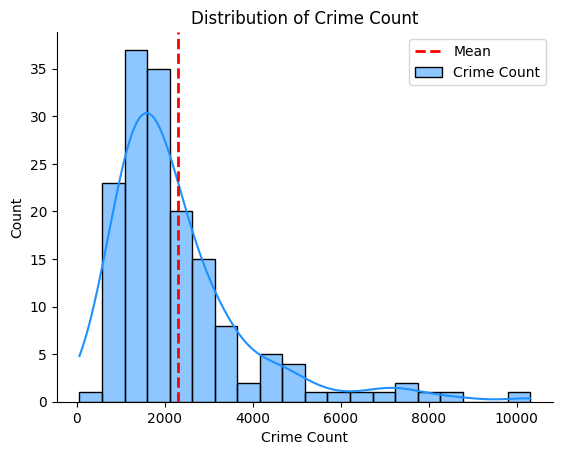

In [7]:
# Plot the Crime Count Histogram
sns.histplot(neighbourhood_counts['Crime_Count'], bins=20, kde=True, color='dodgerblue', edgecolor='black', label='Crime Count')
plt.gca().spines[['top', 'right']].set_visible(False)

# Add a red line at the mean
plt.axvline(neighbourhood_counts['Crime_Count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')

# Show the plot
plt.title('Distribution of Crime Count')
plt.xlabel('Crime Count')
plt.legend()
plt.show()


In [8]:
# Load and read the Neighbourhood file
neighbourhood_file = os.path.join(folder_path, "Neighbourhood_Cleaned_Normalized.csv")
neighbourhood_data = pd.read_csv(neighbourhood_file)

In [9]:
# Check Neighbourhood File for 'geometry' column
if 'geometry' in neighbourhood_data.columns:
    neighbourhood_data.drop(columns=['geometry'], inplace=True)
else:
    print("Column 'geometry' not found in the DataFrame.")

neighbourhood_data

Column 'geometry' not found in the DataFrame.


,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AverageHousePrice,MedianTotalIncome_normalized,AverageTotalIncome_normalized,AverageHousePrice_normalized
0,South Eglinton-Davisville,649,1185,2,22735,52400,69000,29.087555,6.375824,93.624176,1035636,0.520607,0.173043,0.093478
1,North Toronto,286,851,2,15885,46000,58100,31.403497,1.133288,98.866712,1035636,0.381779,0.119580,0.093478
2,Dovercourt Village,1170,534,1,12380,38000,55850,33.231409,7.875048,92.124952,1266076,0.208243,0.108544,0.189245
3,Junction-Wallace Emerson,1663,876,1,23180,41200,54350,33.167140,6.821523,93.178477,1266076,0.277657,0.101187,0.189245
4,Yonge-Bay Corridor,1139,20281,12,12645,44000,68200,48.028587,6.382056,93.617944,880955,0.338395,0.169119,0.029196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,West Humber-Clairville,7704,4254,2,33300,33600,40560,17.465098,11.373365,88.626635,811543,0.112798,0.033549,0.000349
154,Black Creek,1148,541,1,21145,29400,33720,17.667624,15.911150,84.088850,836734,0.021692,0.000000,0.010818
155,Pelmo Park-Humberlea,1223,369,1,11290,39600,49000,14.734703,17.357255,82.642745,836734,0.242950,0.074946,0.010818
156,Humbermede,1031,707,1,16955,32400,38280,17.920562,21.469614,78.530386,836734,0.086768,0.022366,0.010818


In [10]:
# Load the Neighbourhood shapefile
NeighbourhoodBoundary_SHP = os.path.join(folder_path, "Neighbourhoods.shp")
neighbourhood_SHP = gpd.read_file(NeighbourhoodBoundary_SHP)

# Drop all fields except geometry and name fields from neighbourhood_SHP
neighbourhood_SHP = neighbourhood_SHP[['geometry', 'AREA_NA7']]

neighbourhood_SHP

,geometry,AREA_NA7
0,"POLYGON ((-79.38635 43.69783, -79.38623 43.697...",South Eglinton-Davisville
1,"POLYGON ((-79.39744 43.70693, -79.39837 43.706...",North Toronto
2,"POLYGON ((-79.43411 43.66015, -79.43537 43.659...",Dovercourt Village
3,"POLYGON ((-79.43870 43.66766, -79.43841 43.666...",Junction-Wallace Emerson
4,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",Yonge-Bay Corridor
...,...,...
153,"POLYGON ((-79.59037 43.73401, -79.58942 43.732...",West Humber-Clairville
154,"POLYGON ((-79.51915 43.77399, -79.51901 43.773...",Black Creek
155,"POLYGON ((-79.53225 43.73505, -79.52938 43.723...",Pelmo Park-Humberlea
156,"POLYGON ((-79.52813 43.74425, -79.52721 43.740...",Humbermede


In [11]:
# Join the neighbourhood dataframe with the Neighbourhood geodataframe using 'NeighbourhoodName' and 'AREA_NA7' respectively
joined_data = neighbourhood_SHP.merge(neighbourhood_data, left_on='AREA_NA7', right_on='NeighbourhoodName', how='right')

joined_data

,geometry,AREA_NA7,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AverageHousePrice,MedianTotalIncome_normalized,AverageTotalIncome_normalized,AverageHousePrice_normalized
0,"POLYGON ((-79.38635 43.69783, -79.38623 43.697...",South Eglinton-Davisville,South Eglinton-Davisville,649,1185,2,22735,52400,69000,29.087555,6.375824,93.624176,1035636,0.520607,0.173043,0.093478
1,"POLYGON ((-79.39744 43.70693, -79.39837 43.706...",North Toronto,North Toronto,286,851,2,15885,46000,58100,31.403497,1.133288,98.866712,1035636,0.381779,0.119580,0.093478
2,"POLYGON ((-79.43411 43.66015, -79.43537 43.659...",Dovercourt Village,Dovercourt Village,1170,534,1,12380,38000,55850,33.231409,7.875048,92.124952,1266076,0.208243,0.108544,0.189245
3,"POLYGON ((-79.43870 43.66766, -79.43841 43.666...",Junction-Wallace Emerson,Junction-Wallace Emerson,1663,876,1,23180,41200,54350,33.167140,6.821523,93.178477,1266076,0.277657,0.101187,0.189245
4,"POLYGON ((-79.38404 43.64497, -79.38502 43.644...",Yonge-Bay Corridor,Yonge-Bay Corridor,1139,20281,12,12645,44000,68200,48.028587,6.382056,93.617944,880955,0.338395,0.169119,0.029196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,"POLYGON ((-79.59037 43.73401, -79.58942 43.732...",West Humber-Clairville,West Humber-Clairville,7704,4254,2,33300,33600,40560,17.465098,11.373365,88.626635,811543,0.112798,0.033549,0.000349
154,"POLYGON ((-79.51915 43.77399, -79.51901 43.773...",Black Creek,Black Creek,1148,541,1,21145,29400,33720,17.667624,15.911150,84.088850,836734,0.021692,0.000000,0.010818
155,"POLYGON ((-79.53225 43.73505, -79.52938 43.723...",Pelmo Park-Humberlea,Pelmo Park-Humberlea,1223,369,1,11290,39600,49000,14.734703,17.357255,82.642745,836734,0.242950,0.074946,0.010818
156,"POLYGON ((-79.52813 43.74425, -79.52721 43.740...",Humbermede,Humbermede,1031,707,1,16955,32400,38280,17.920562,21.469614,78.530386,836734,0.086768,0.022366,0.010818


In [12]:
# Join the aggregated crime counts with neighborhood joined_data based on the common neighborhood field (NeighbourhoodName)
neighbourhood_merged = joined_data.merge(neighbourhood_counts, on='NeighbourhoodName', how='left')

# Drop rows with missing values (if any)
neighbourhood_merged = neighbourhood_merged.dropna(subset=['Crime_Count'])

In [13]:
# Check if all geometries are valid
all_valid = neighbourhood_merged.geometry.is_valid.all()

if all_valid:
    print("All geometries are valid.")
else:
    print("Some geometries are invalid.")

All geometries are valid.


In [14]:
# Convert neighbourhood_merged to a geodataframe
neighbourhood_gdf = gpd.GeoDataFrame(neighbourhood_merged, geometry='geometry')

neighbourhood_gdf.info() # Check geo dataframe data type

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geometry                       158 non-null    geometry
 1   AREA_NA7                       158 non-null    object  
 2   NeighbourhoodName              158 non-null    object  
 3   Poles_Count                    158 non-null    int64   
 4   POI_Count                      158 non-null    int64   
 5   TCamera_Count                  158 non-null    int64   
 6   TotalPopulation                158 non-null    int64   
 7   MedianTotalIncome              158 non-null    int64   
 8   AverageTotalIncome             158 non-null    int64   
 9   BuildingCoveragePERCENTAGE     158 non-null    float64 
 10  ParksOSNAPERCENTAGE            158 non-null    float64 
 11  BuiltUpPERCENTAGE              158 non-null    float64 
 12  AverageHousePrice           

In [15]:
# Select relevant features for further analysis
neighbourhood_gdf = neighbourhood_gdf[['NeighbourhoodName', 'Crime_Count', 'Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 'MedianTotalIncome',
                                      'AverageTotalIncome','AverageHousePrice', 'BuildingCoveragePERCENTAGE', 
                                      'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE', 'geometry']]

neighbourhood_gdf

,NeighbourhoodName,Crime_Count,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,AverageHousePrice,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,geometry
0,South Eglinton-Davisville,1539,649,1185,2,22735,52400,69000,1035636,29.087555,6.375824,93.624176,"POLYGON ((-79.38635 43.69783, -79.38623 43.697..."
1,North Toronto,1334,286,851,2,15885,46000,58100,1035636,31.403497,1.133288,98.866712,"POLYGON ((-79.39744 43.70693, -79.39837 43.706..."
2,Dovercourt Village,1652,1170,534,1,12380,38000,55850,1266076,33.231409,7.875048,92.124952,"POLYGON ((-79.43411 43.66015, -79.43537 43.659..."
3,Junction-Wallace Emerson,2944,1663,876,1,23180,41200,54350,1266076,33.167140,6.821523,93.178477,"POLYGON ((-79.43870 43.66766, -79.43841 43.666..."
4,Yonge-Bay Corridor,7294,1139,20281,12,12645,44000,68200,880955,48.028587,6.382056,93.617944,"POLYGON ((-79.38404 43.64497, -79.38502 43.644..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,West Humber-Clairville,10309,7704,4254,2,33300,33600,40560,811543,17.465098,11.373365,88.626635,"POLYGON ((-79.59037 43.73401, -79.58942 43.732..."
154,Black Creek,3527,1148,541,1,21145,29400,33720,836734,17.667624,15.911150,84.088850,"POLYGON ((-79.51915 43.77399, -79.51901 43.773..."
155,Pelmo Park-Humberlea,1682,1223,369,1,11290,39600,49000,836734,14.734703,17.357255,82.642745,"POLYGON ((-79.53225 43.73505, -79.52938 43.723..."
156,Humbermede,2669,1031,707,1,16955,32400,38280,836734,17.920562,21.469614,78.530386,"POLYGON ((-79.52813 43.74425, -79.52721 43.740..."


The **Global Moran's I**, which is an inferential statistical tool, was further used for assessing spatial autocorrelation in the Neighbourhood dataset. The tool computes the Moran’s I Index value, which ranges between **-1.0** and **+1.0**, and assesses whether the observed pattern is clustered, dispersed, or random. By examining both the actual crime counts and the residuals from the linear regression model, we found significant spatial autocorrelation. The low p-values of **0.001** in both cases indicate that neighboring areas tend to have similar crime counts. Consequently, we reject the null hypothesis of randomness, confirming the presence of spatial autocorrelation.

The results from the OLS regression analysis shows how the independent variables (predictors) may influence the dependent variable. The adjusted R-squared value of **0.704** indicates the model good fit, which is a measure of how well the independent variables explain the variability of the dependent variable. Moreso, the F-statistic tests the overall significance of the model, a value of **42.48** with a very low probability suggests the model is statistically significant. This estimates assumes constant variance of errors (homoscedasticity) and does not account for spatial dependencies.

In [16]:
# Create a spatial weights matrix using queen contiguity
W = lps.weights.Queen.from_dataframe(neighbourhood_gdf)

# Perform Global Moran's I analysis on dependent variable
moran = Moran(neighbourhood_gdf['Crime_Count'], W)

# Print the Moran's I statistic and p-value
print('Moran\'s I:', moran.I)
print('p-value:', moran.p_sim)

Moran's I: 0.23774395116978736
p-value: 0.001


In [17]:
# Create a model to the predict the crime count using OLS regression analysis
import statsmodels.api as sm

# Define the Independent variables
X = neighbourhood_gdf.drop(columns=['NeighbourhoodName', 'Crime_Count', 'geometry'])

# Add a constant term to the matrix
X = sm.add_constant(X)

# Define the Dependent variable
y = neighbourhood_gdf['Crime_Count']

# Fit linear regression model
linear_model = sm.OLS(y, X).fit()

# Print the final model summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Crime_Count   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     42.48
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.04e-36
Time:                        12:03:31   Log-Likelihood:                -1288.7
No. Observations:                 158   AIC:                             2597.
Df Residuals:                     148   BIC:                             2628.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [18]:
# Perform diagnostics on the residuals (predicted - actual) crime count
residual_moran = Moran(linear_model.resid, W)
# Print the Moran's I test statistic and p-value
print(f"Moran's I test statistic: {residual_moran.I}")
print(f"p-value: {residual_moran.p_sim}")

Moran's I test statistic: 0.2554046065892358
p-value: 0.001


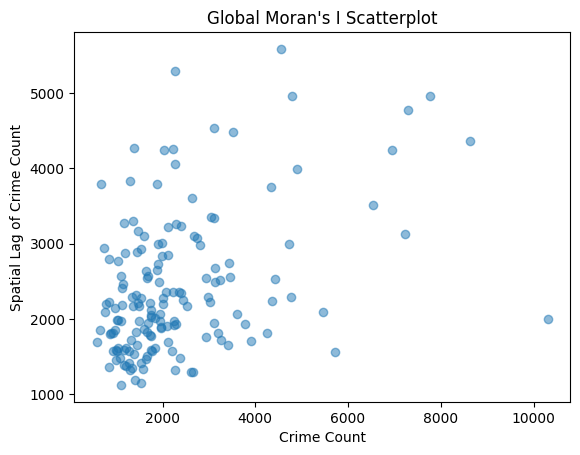

In [19]:
# Calculate spatial lag of the dependent variable (Crime_Count)
spatial_lag = lps.weights.lag_spatial(W, neighbourhood_gdf['Crime_Count'])

# Create a scatter plot of the dependent variable against the spatial lag of the dependent variable
plt.scatter(neighbourhood_gdf['Crime_Count'], spatial_lag, alpha=0.5)
plt.xlabel('Crime Count')
plt.ylabel('Spatial Lag of Crime Count')
plt.title('Global Moran\'s I Scatterplot')
plt.show() # Show the plot


In further effort to account for spatial dependencies among observations, we employed the **Maximum Likelihood Spatial Lag** (SAR) model to explore the relationship between neighborhood characteristics and crime counts. The model demonstrates strong explanatory power, accounting for approximately **74.5%** of the variance in crime counts. Notably, spatial dependencies among neighboring areas are considered through the spatial lag component. Among the independent variables, several stand out as significant predictors: Poles_Count, POI_Count, TotalPopulation, and BuildingCoveragePERCENTAGE positively influence crime counts. Conversely, MedianTotalIncome has a negative impact. The spatial pseudo R-squared further confirms that around **71.1%** of the spatial variation is captured by the model. These findings provide valuable insights for understanding crime patterns within neighborhoods.

In [ ]:
# Perform spatial autoregressive analysis (SAR)

import scipy.sparse as sp
from spreg import ML_Lag

# Convert weights matrix to row-standardized form
W.transform = 'R'

# Define the Independent variables (X)
X = neighbourhood_gdf.drop(columns=['NeighbourhoodName', 'Crime_Count', 'geometry'])

# Define the Dependent variable
y = neighbourhood_gdf['Crime_Count']

# Convert the y and X variables to to NumPy arrays 
y = np.array(y)
X = np.array(X)

# Fit the SLR model
slr_model = ML_Lag(y, X, w=W, name_y='Crime_Count', name_x=['Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 'MedianTotalIncome', 'AverageTotalIncome', 'AverageHousePrice', 'BuildingCoveragePERCENTAGE', 'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE'])

# Print summary of SLR results
print(slr_model.summary)